In [54]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [55]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [56]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [57]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [58]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [59]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [60]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90f461093ca64c4b9c54d64d671648e7


In [61]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [62]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [63]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [64]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | tiksi
Processing Record 2 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 13 | mahebourg
Processing Record 4 of Set 13 | busselton
Processing Record 5 of Set 13 | kisangani
Processing Record 6 of Set 13 | new norfolk
Processing Record 7 of Set 13 | barrow
Processing Record 8 of Set 13 | beringovskiy
Processing Record 9 of Set 13 | loiza
Processing Record 10 of Set 13 | narsaq
Processing Record 11 of Set 13 | veraval
Processing Record 12 of Set 13 | thap than
Processing Record 13 of Set 13 | cape town
Processing Record 14 of Set 13 | yulara
Processing Record 15 of Set 13 | bluff
Processing Record 16 of Set 13 | novotroitskaya
Processing Record 17 of Set 13 | mangit
Processing Record 18 of Set 13 | rawson
Processing Record 19 of Set 13 | thompson
Processing Record 20 of Set 13 | sola
Processing Record 21 of Set 13 | sugod
Processing Record 22 of Set 13 | nguiu
City not found. Skipping...
Processing Record 23 of Set 13 | bandarb

Processing Record 33 of Set 16 | grimshaw
Processing Record 34 of Set 16 | masty
Processing Record 35 of Set 16 | husavik
Processing Record 36 of Set 16 | jaisalmer
Processing Record 37 of Set 16 | broome
Processing Record 38 of Set 16 | okhotsk
Processing Record 39 of Set 16 | saint-augustin
Processing Record 40 of Set 16 | bambous virieux
Processing Record 41 of Set 16 | tynda
Processing Record 42 of Set 16 | cartagena
Processing Record 43 of Set 16 | puerto ayora
Processing Record 44 of Set 16 | evans
Processing Record 45 of Set 16 | sitka
Processing Record 46 of Set 16 | arawa
Processing Record 47 of Set 16 | ejura
Processing Record 48 of Set 16 | ostrovnoy
Processing Record 49 of Set 16 | saint-pierre
Processing Record 50 of Set 16 | amahai
Processing Record 1 of Set 17 | khatanga
Processing Record 2 of Set 17 | nizhnyaya salda
Processing Record 3 of Set 17 | opuwo
Processing Record 4 of Set 17 | laguna
Processing Record 5 of Set 17 | itarema
Processing Record 6 of Set 17 | kaeo
P

Processing Record 22 of Set 20 | miri
Processing Record 23 of Set 20 | mafinga
Processing Record 24 of Set 20 | pisco
Processing Record 25 of Set 20 | necochea
Processing Record 26 of Set 20 | shwebo
Processing Record 27 of Set 20 | simao
Processing Record 28 of Set 20 | marcona
City not found. Skipping...
Processing Record 29 of Set 20 | bereda
Processing Record 30 of Set 20 | farmington
Processing Record 31 of Set 20 | ngunguru
Processing Record 32 of Set 20 | praia
Processing Record 33 of Set 20 | jubayl
City not found. Skipping...
Processing Record 34 of Set 20 | yerbogachen
Processing Record 35 of Set 20 | bantou
Processing Record 36 of Set 20 | lompoc
Processing Record 37 of Set 20 | komsomolskiy
Processing Record 38 of Set 20 | sisimiut
Processing Record 39 of Set 20 | koslan
Processing Record 40 of Set 20 | visby
Processing Record 41 of Set 20 | sun valley
Processing Record 42 of Set 20 | skerries
Processing Record 43 of Set 20 | avera
Processing Record 44 of Set 20 | karachi
P

Processing Record 9 of Set 24 | sterling
Processing Record 10 of Set 24 | asfi
Processing Record 11 of Set 24 | prado
Processing Record 12 of Set 24 | sungaipenuh
Processing Record 13 of Set 24 | leticia
Processing Record 14 of Set 24 | mahibadhoo
Processing Record 15 of Set 24 | selenduma
Processing Record 16 of Set 24 | san quintin
Processing Record 17 of Set 24 | tucupita
Processing Record 18 of Set 24 | hunza
City not found. Skipping...
Processing Record 19 of Set 24 | daru
Processing Record 20 of Set 24 | christchurch
Processing Record 21 of Set 24 | santa helena
Processing Record 22 of Set 24 | bud
Processing Record 23 of Set 24 | atasu
Processing Record 24 of Set 24 | sept-iles
Processing Record 25 of Set 24 | muroto
Processing Record 26 of Set 24 | bourg-en-bresse
Processing Record 27 of Set 24 | darhan
Processing Record 28 of Set 24 | broken hill
Processing Record 29 of Set 24 | lubaczow
Processing Record 30 of Set 24 | verkhoyansk
Processing Record 31 of Set 24 | shihezi
Proc

In [65]:
len(city_data)

572

In [66]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tiksi,71.6872,128.8694,34.99,97,100,18.66,RU,2021-09-26 10:51:20
1,Mahebourg,-20.4081,57.7000,77.25,73,75,12.66,MU,2021-09-26 10:51:20
2,Busselton,-33.6500,115.3333,57.04,90,43,10.92,AU,2021-09-26 10:51:21
3,Kisangani,0.5167,25.2000,73.47,83,99,4.23,CD,2021-09-26 10:51:21
4,New Norfolk,-42.7826,147.0587,45.72,62,10,1.86,AU,2021-09-26 10:51:21
5,Barrow,71.2906,-156.7887,19.42,86,40,4.61,US,2021-09-26 10:51:13
6,Beringovskiy,63.0500,179.3167,35.38,62,42,7.85,RU,2021-09-26 10:51:22
7,Loiza,18.4313,-65.8802,80.58,88,20,0.00,PR,2021-09-26 10:51:22
8,Narsaq,60.9167,-46.0500,32.95,39,2,6.46,GL,2021-09-26 10:51:22
9,Veraval,20.9000,70.3667,82.51,74,49,7.40,IN,2021-09-26 10:51:23


In [67]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tiksi,RU,2021-09-26 10:51:20,71.6872,128.8694,34.99,97,100,18.66
1,Mahebourg,MU,2021-09-26 10:51:20,-20.4081,57.7000,77.25,73,75,12.66
2,Busselton,AU,2021-09-26 10:51:21,-33.6500,115.3333,57.04,90,43,10.92
3,Kisangani,CD,2021-09-26 10:51:21,0.5167,25.2000,73.47,83,99,4.23
4,New Norfolk,AU,2021-09-26 10:51:21,-42.7826,147.0587,45.72,62,10,1.86
...,...,...,...,...,...,...,...,...,...
567,Pombia,IT,2021-09-26 10:56:13,45.6530,8.6336,69.08,91,75,4.61
568,Isangel,VU,2021-09-26 10:56:14,-19.5500,169.2667,69.57,70,22,7.85
569,Orange,US,2021-09-26 10:56:14,33.7000,-117.7675,67.82,87,8,3.02
570,Victoria,HK,2021-09-26 10:56:15,22.2855,114.1577,87.22,73,20,1.01


In [68]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [69]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

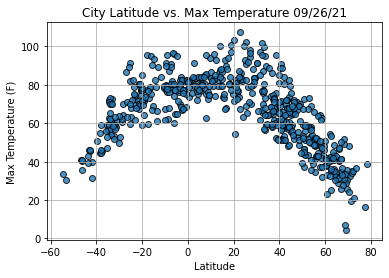

In [70]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

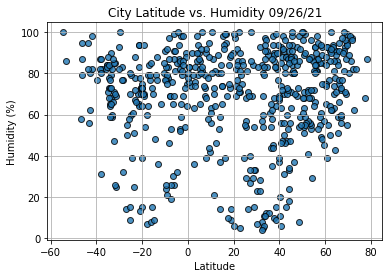

In [71]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

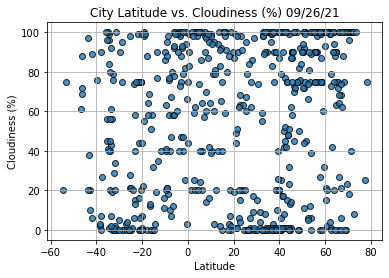

In [72]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

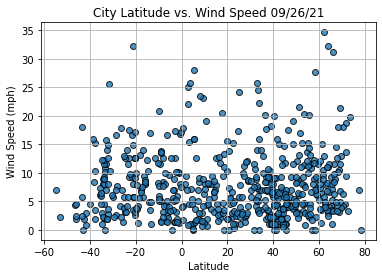

In [73]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [76]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [77]:
index13 = city_data_df.loc[13]
index13

City                        Bluff
Country                        NZ
Date          2021-09-26 10:51:24
Lat                         -46.6
Lng                      168.3333
Max Temp                     40.8
Humidity                       58
Cloudiness                     61
Wind Speed                   4.29
Name: 13, dtype: object

In [78]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4      False
       ...  
567     True
568    False
569     True
570     True
571     True
Name: Lat, Length: 572, dtype: bool

In [85]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tiksi,RU,2021-09-26 10:51:20,71.6872,128.8694,34.99,97,100,18.66
3,Kisangani,CD,2021-09-26 10:51:21,0.5167,25.2000,73.47,83,99,4.23
5,Barrow,US,2021-09-26 10:51:13,71.2906,-156.7887,19.42,86,40,4.61
6,Beringovskiy,RU,2021-09-26 10:51:22,63.0500,179.3167,35.38,62,42,7.85
7,Loiza,PR,2021-09-26 10:51:22,18.4313,-65.8802,80.58,88,20,0.00
...,...,...,...,...,...,...,...,...,...
566,Cherdyn,RU,2021-09-26 10:56:13,60.4030,56.4787,41.04,84,100,12.15
567,Pombia,IT,2021-09-26 10:56:13,45.6530,8.6336,69.08,91,75,4.61
569,Orange,US,2021-09-26 10:56:14,33.7000,-117.7675,67.82,87,8,3.02
570,Victoria,HK,2021-09-26 10:56:15,22.2855,114.1577,87.22,73,20,1.01


In [86]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tiksi,RU,2021-09-26 10:51:20,71.6872,128.8694,34.99,97,100,18.66
3,Kisangani,CD,2021-09-26 10:51:21,0.5167,25.2000,73.47,83,99,4.23
5,Barrow,US,2021-09-26 10:51:13,71.2906,-156.7887,19.42,86,40,4.61
6,Beringovskiy,RU,2021-09-26 10:51:22,63.0500,179.3167,35.38,62,42,7.85
7,Loiza,PR,2021-09-26 10:51:22,18.4313,-65.8802,80.58,88,20,0.00


In [87]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

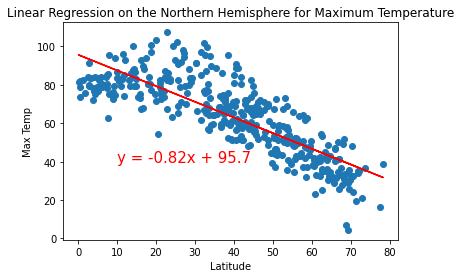

In [96]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

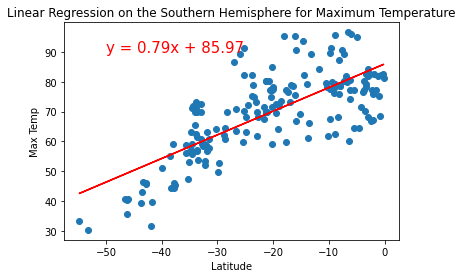

In [97]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

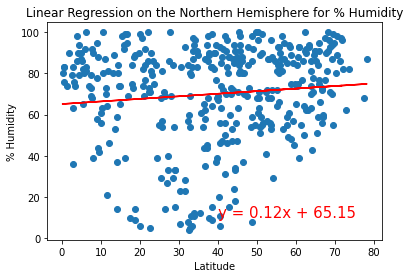

In [99]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

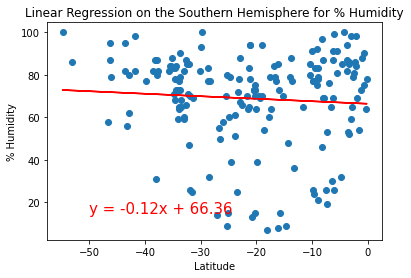

In [101]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

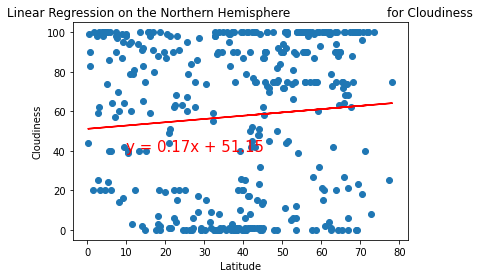

In [102]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Cloudiness',(10,40))

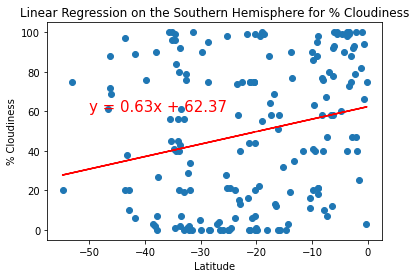

In [109]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

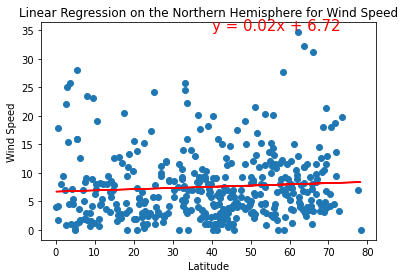

In [123]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

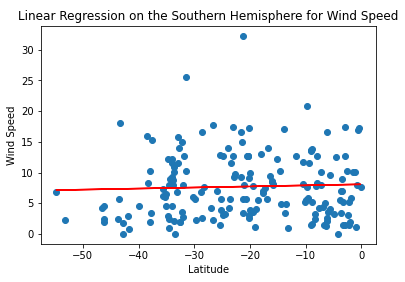

In [132]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))